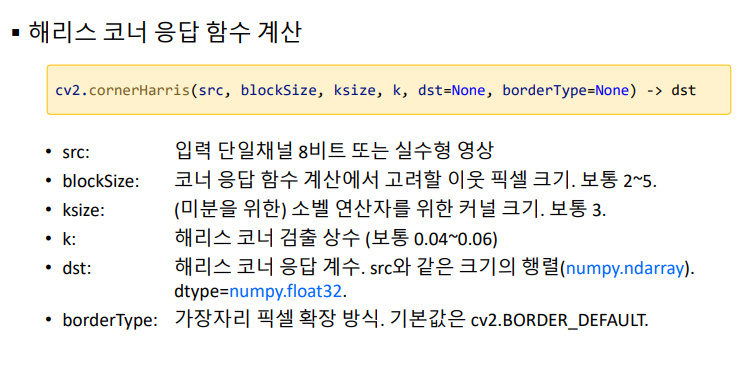
1. 입력영상
2. 블럭 사이즈로 2~5값을 줍니다. 보통 3을 줍니다.
3. ksize : 소벨연산자로하는 3을 줍니다.
4. k : 0.04를 보통 주는게 좋습니다.
5. 출력영상을 리턴으로 받습니다. 그냥 default가 적당합니다.

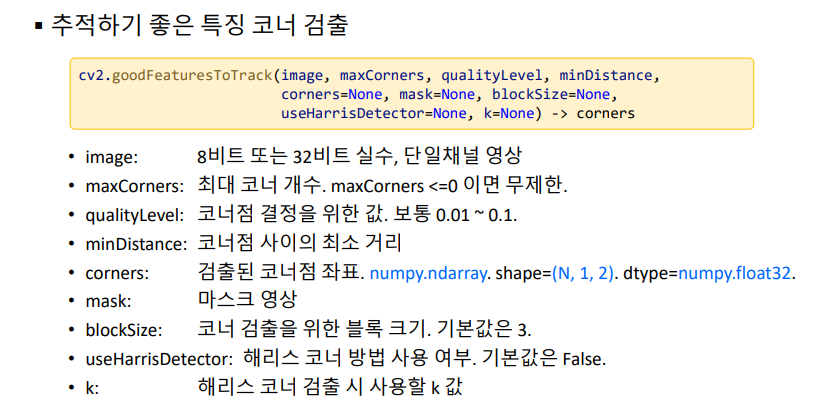 
코너 해리스보다 이게 좋습니다. 인자가 좀더 많아서 복잡할 수 있는데요.
1. 입력영상  
2. maxCorners는 몇개의 코너를 검출할거이냐 입니다. 0 이하를 선택하면 모든 코너를 찾아서 리턴해 줍니다.
3. qualityLevel은 0.01을 주는것이 좋습니다.
4. minDistance는 코너점 사이의 최로 거리로, 10픽셀로 설정하면 그중 하나를 선택합니다.
5. 코너스는 ndarray로 리턴해주고 점들 좌표를 3차원 행렬로 줍니다. N은 코너점의 개수로 float.32입니다. 혹시라도 출력하고 싶으면 int 타입으로 convert해야합니다 

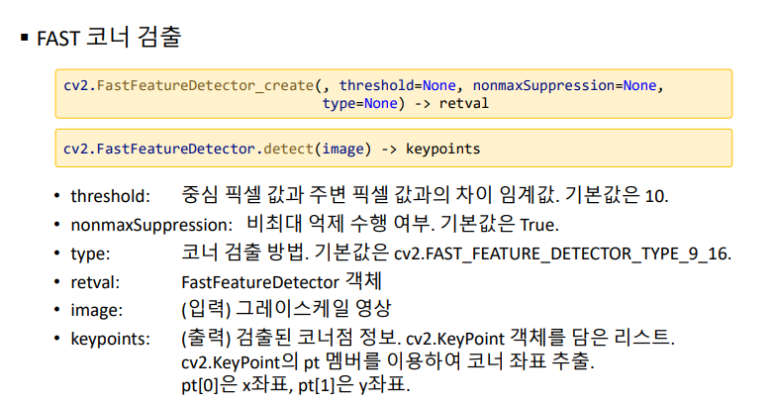
Fast는 클래스 객체를 만들어서 detect를 호출해서 입력영상의 코너점을 호출합니다.  
threshold는 P점 어두운점에서 '충분히'밝은것이 9이상, 여기서 충분히 표현에서 쓰는게 threshold입니다. 픽셀보다 50정도 밝은거라는 뜻이죠. threshold는 30~ 60정도가 적당합니다.  
nonmaxSuppression은 그냥 none해주시구요 type도 None해주세요. threshold만 바꿔서 쓰시는게 좋습니다. 

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


!pip install opencv-python

In [18]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

In [19]:
if src is None:

    print('Image load failed!')

    sys.exit()

시간측정을 해보겠습니다.

점들의 좌표가 ndarray로 리턴됩니다. N,1,2 형태이며 N은 좌표의 개수, 2는 좌표겠죠.

In [20]:
tm = cv2.TickMeter()
tm.start()

corners = cv2.goodFeaturesToTrack(src, 400, 0.01, 10)

tm.stop()

print('GFTT: {}ms.'.format(tm.getTimeMilli()))

GFTT: 13.0103ms.


In [21]:
dst1 = cv2.cvtColor(src, cv2.COLOR_GRAY2RGB)

In [22]:
if corners is not None:#검출이 하나라도됐으면,

    for i in range(corners.shape[0]):#shape 0번째 element 개수(코너개수)만큼 돈다. 

        pt = (int(corners[i, 0, 0]), int(corners[i, 0, 1]))

        #점의 좌표를 int type으로 변환을 한다. X,Y좌표

        cv2.circle(dst1, pt, 5, (0, 0, 255), 2)

이제 FastFetureDetector 함수를 써보겠습니다.  
여기서 60은 threshold 값입니다.

In [23]:
tm.reset()#시간리셋해야한다. 

tm.start()



fast = cv2.FastFeatureDetector_create(60)#없어도 무관

keypoints = fast.detect(src)

#keypoints라고하는 opencv의 클래스객체를 리스트로 반환
#코너 좌표인 x,y촤표를 반환하죠.


tm.stop()#시간측정

print('FAST: {}ms.'.format(tm.getTimeMilli()))

FAST: 9.3405ms.


In [24]:
dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2RGB)

In [25]:
for kp in keypoints: #리스트동안 돌기

    pt = (int(kp.pt[0]), int(kp.pt[1]))

    cv2.circle(dst2, pt, 5, (0, 0, 255), 2)

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x2005c413be0>)

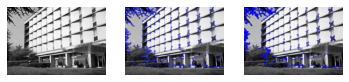

In [27]:
plt.subplot(131),plt.axis('off'),plt.imshow(src,cmap='gray')
plt.subplot(132),plt.axis('off'),plt.imshow(dst1)
plt.subplot(133),plt.axis('off'),plt.imshow(dst2)

In [29]:
cv2.imshow('src', src)

cv2.imshow('dst1', dst1)

cv2.imshow('dst2', dst2)

cv2.waitKey()


cv2.destroyAllWindows()

지금 현재 FAST가 9ms가 나왔지만 다른 환경에서는 보통 1ms이하가 나온다. 1ms이하면 실시간 처리해도 적합하다.